<a href="https://colab.research.google.com/github/LucasBezerraSantos/Alura_Machine_Learning/blob/master/Clustering_cartao_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de Dados

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('drive_cotent')

Mounted at drive_cotent


In [ ]:
dataframe = pd.read_csv('/content/drive_cotent/MyDrive/Conjuntos_de_Dados/Kaggle/CC GENERAL.csv')
dataframe.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


## Pré-processamento

In [ ]:
dataframe.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True )

In [ ]:
dataframe.fillna(dataframe.median(), inplace=True)

In [ ]:
dataframe.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
values = Normalizer().fit_transform(dataframe.values)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans( n_clusters=5, n_init=10, max_iter=300 )
y_pred = kmeans.fit_predict(values)

## Validação

### Coeficiente de Silhouette

In [ ]:
from sklearn import metrics

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score( values, labels, metric='euclidean' )
print(round(silhouette, 4))

0.3644


### Davies Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score( values, labels )
print(round(dbs, 4))

1.0759


### Calinski Harabasz

In [ ]:
calinski = metrics.calinski_harabasz_score( values, labels )
print(round(calinski, 4))

3431.7825


### Testando hiper-parâmetros

In [ ]:
def clustering_metrics(dataframe, n_clustering):

  kmeans = KMeans( n_clusters=n_clustering, n_init=10, max_iter=300 )
  labels = kmeans.fit_predict(dataframe)

  silhouette = metrics.silhouette_score( dataframe, labels, metric='euclidean' )
  dbs = metrics.davies_bouldin_score( dataframe, labels )
  calinski = metrics.calinski_harabasz_score( dataframe, labels )
  
  return silhouette, dbs, calinski

Comparativo

In [ ]:
silhouette1, dbs1, calinski1 = clustering_metrics(values, 4)
print( f'silhouette: {silhouette1:.4f}, dbs: {dbs1:.4f}, calinski: {calinski1:.4f}' )

silhouette: 0.3483, dbs: 1.2212, calinski: 3528.7002


In [ ]:
silhouette2, dbs2, calinski2 = clustering_metrics(values, 5)
print( f'silhouette: {silhouette2:.4f}, dbs: {dbs2:.4f}, calinski: {calinski2:.4f}' )

silhouette: 0.3644, dbs: 1.0759, calinski: 3431.7825


In [ ]:
silhouette3, dbs3, calinski3 = clustering_metrics(values, 6)
print( f'silhouette: {silhouette3:.4f}, dbs: {dbs3:.4f}, calinski: {calinski3:.4f}' )

silhouette: 0.3649, dbs: 1.0453, calinski: 3523.5169


Teste com valores aleatórios

In [ ]:
random_data = np.random.rand(8950, 16)

In [ ]:
silhouette_rd, dbs_rd, calinski_rd = clustering_metrics(random_data, 5)

In [ ]:
print( f'TESTE silhouette: {silhouette_rd:.4f}, dbs: {dbs_rd:.4f}, calinski: {calinski_rd:.4f}\n' )
print( f'silhouette: {silhouette2:.4f}, dbs: {dbs2:.4f}, calinski: {calinski2:.4f}' )

TESTE silhouette: 0.0392, dbs: 3.5028, calinski: 302.5057

silhouette: 0.3644, dbs: 1.0759, calinski: 3431.7825


Teste de estabilidade dos clusters

In [ ]:
set1, set2, set3 = np.array_split(values, 3)

In [ ]:
silhouette_set1 , dbs_set1, calinski_set1 = clustering_metrics(set1, 5)
silhouette_set2 , dbs_set2, calinski_set2 = clustering_metrics(set2, 5)
silhouette_set3 , dbs_set3, calinski_set3 = clustering_metrics(set3, 5)

In [ ]:
print( f'SET 1 silhouette: {silhouette_set1:.4f}, dbs: {dbs_set1:.4f}, calinski: {calinski_set1:.4f}\n' )
print( f'SET 2 silhouette: {silhouette_set2:.4f}, dbs: {dbs_set2:.4f}, calinski: {calinski_set2:.4f}\n' )
print( f'SET 3 silhouette: {silhouette_set3:.4f}, dbs: {dbs_set3:.4f}, calinski: {calinski_set3:.4f}' )

SET 1 silhouette: 0.3710, dbs: 1.0422, calinski: 1200.2021

SET 2 silhouette: 0.3540, dbs: 1.1396, calinski: 1194.9385

SET 3 silhouette: 0.3670, dbs: 1.0985, calinski: 1167.5310


### Visualização

In [ ]:
import matplotlib.pyplot as plt

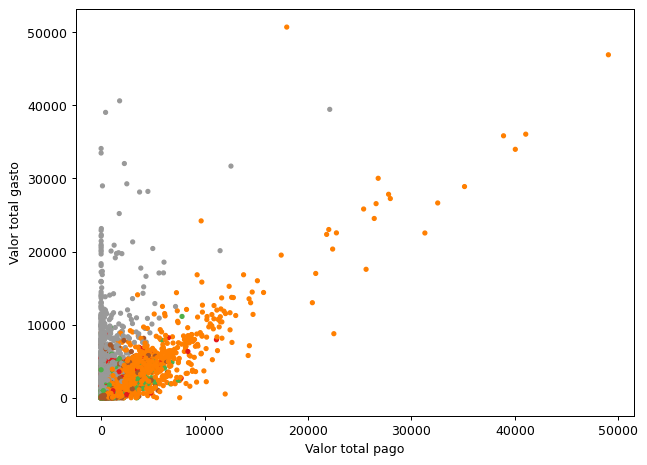

In [ ]:
plt.figure(figsize=(8,6), dpi=(90))
plt.scatter( x='PURCHASES', y='PAYMENTS', data=dataframe, c=labels, s=10, cmap='Set1')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()


## Interpretando Clusters

In [ ]:
dataframe['Clusters'] = labels

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
#calculo de variancia para selecionar os atributos mais importantes

max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], round(centroids[:, i].var(), 4))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0076
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
CASH_ADVANCE_TRX 0.0
PURCHASES_TRX 0.0
CREDIT_LIMIT 0.036
PAYMENTS 0.028
MINIMUM_PAYMENTS 0.0542
PRC_FULL_PAYMENT 0.0


In [ ]:
description = dataframe.groupby('Clusters')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['Clientes'] = n_clients

In [ ]:
description   # visualização das médias gerais

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Clientes
Clusters,,,,,,
0,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
2,1140.395363,3266.466710,182.900631,4096.794388,3034.900772,1541
3,444.212219,629.173858,141.655729,5134.705973,814.396458,3276
4,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072


In [ ]:
dataframe.groupby("Clusters")["PRC_FULL_PAYMENT"].describe()    # visualização de histórico de pagamento

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
3,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
4,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0


CLUSTER 4: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 3: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 0: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.